# Predicting Daily COVID-19 cases in Ireland

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_excel("covid19.xlsx")
df = df.loc[(df["location"]=="Ireland")]
df.head()

,Unnamed: 0,date,location,new_cases_smoothed
0,0,2020-02-29,Ireland,NaN
1,1,2020-03-01,Ireland,NaN
2,2,2020-03-02,Ireland,NaN
3,3,2020-03-03,Ireland,NaN
4,4,2020-03-04,Ireland,NaN


In [68]:
df = df.drop("Unnamed: 0", axis = 1)
df = df.fillna(0)
df.head()

,date,location,new_cases_smoothed
0,2020-02-29,Ireland,0.0
1,2020-03-01,Ireland,0.0
2,2020-03-02,Ireland,0.0
3,2020-03-03,Ireland,0.0
4,2020-03-04,Ireland,0.0


In [69]:
df.tail()

,date,location,new_cases_smoothed
730,2022-02-28,Ireland,3377.714
731,2022-03-01,Ireland,3380.286
732,2022-03-02,Ireland,3269.000
733,2022-03-03,Ireland,3313.857
734,2022-03-04,Ireland,3269.714


In [70]:
df["date"] = pd.to_datetime(df["date"])
df.sort_values(by='date', ascending=True, inplace=True)
df = df.set_index("date")
df.tail()

,location,new_cases_smoothed
date,,
2022-02-28,Ireland,3377.714
2022-03-01,Ireland,3380.286
2022-03-02,Ireland,3269.000
2022-03-03,Ireland,3313.857
2022-03-04,Ireland,3269.714


In [71]:
df_new_cases =  df[['new_cases_smoothed']]
df_new_cases.loc[:,'yesterday'] = df_new_cases.loc[:,'new_cases_smoothed'].shift()
df_new_cases.loc[:,'yesterday_diff'] = df_new_cases.loc[:,'yesterday'].diff()
df_new_cases.loc[:,'yesterday2'] = df_new_cases.loc[:,'yesterday'].shift()
df_new_cases.loc[:,'yesterday_diff2'] = df_new_cases.loc[:,'yesterday2'].diff()
df_new_cases.loc[:,'yesterday3'] = df_new_cases.loc[:,'yesterday2'].shift()
df_new_cases.loc[:,'yesterday_diff3'] = df_new_cases.loc[:,'yesterday3'].diff()
df_new_cases.loc[:,'yesterday4'] = df_new_cases.loc[:,'yesterday3'].shift()
df_new_cases.loc[:,'yesterday_diff4'] = df_new_cases.loc[:,'yesterday4'].diff()
df_new_cases.loc[:,'yesterday5'] = df_new_cases.loc[:,'yesterday4'].shift()
df_new_cases.loc[:,'yesterday_diff5'] = df_new_cases.loc[:,'yesterday5'].diff()
df_new_cases.loc[:,'yesterday6'] = df_new_cases.loc[:,'yesterday5'].shift()
df_new_cases.loc[:,'yesterday_diff6'] = df_new_cases.loc[:,'yesterday6'].diff()
df_new_cases.loc[:,'yesterday7'] = df_new_cases.loc[:,'yesterday6'].shift()
df_new_cases.loc[:,'yesterday_diff7'] = df_new_cases.loc[:,'yesterday7'].diff()
df_new_cases = df_new_cases.fillna(0)
df_new_cases

,new_cases_smoothed,yesterday,yesterday_diff,yesterday2,yesterday_diff2,yesterday3,yesterday_diff3,yesterday4,yesterday_diff4,yesterday5,yesterday_diff5,yesterday6,yesterday_diff6,yesterday7,yesterday_diff7
date,,,,,,,,,,,,,,,
2020-02-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-03-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-03-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-03-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2020-03-04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,3377.714,3869.714,0.000,3869.714,0.000,3869.714,-70.143,3939.857,-185.286,4125.143,-163.286,4288.429,4288.429,0.000,0.000
2022-03-01,3380.286,3377.714,-492.000,3869.714,0.000,3869.714,0.000,3869.714,-70.143,3939.857,-185.286,4125.143,-163.286,4288.429,4288.429
2022-03-02,3269.000,3380.286,2.572,3377.714,-492.000,3869.714,0.000,3869.714,0.000,3869.714,-70.143,3939.857,-185.286,4125.143,-163.286


In [72]:
xtrain = df_new_cases[:'2021'].drop(['new_cases_smoothed'], axis = 1)
ytrain = df_new_cases.loc[:'2021','new_cases_smoothed']
xtest = df_new_cases['2022'].drop(['new_cases_smoothed'], axis = 1)
ytest = df_new_cases.loc['2022','new_cases_smoothed']

In [73]:
models = []
models.append(('LR', LinearRegression())) 
models.append(('NN', MLPRegressor(solver = 'lbfgs'))) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) 
models.append(('SVR', SVR(gamma='auto'))) 

LR: 0.985686 (0.007506)
NN: 0.987861 (0.006741)
KNN: 0.337189 (0.338256)
RF: 0.405301 (0.377851)
SVR: -0.583381 (0.039667)


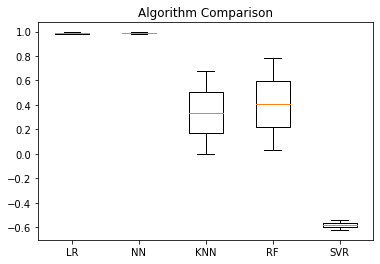

In [79]:
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=2)
    
    cv_results = cross_val_score(model, xtrain, ytrain, cv = tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [81]:
model = MLPRegressor()

param_search = {
    "hidden_layer_sizes": [(1,),(50,),(100,),(150,),(200,)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.00005,0.0005, 0.005],
    "learning_rate": ['constant', 'invscaling', 'adaptive']
}

In [83]:
tsvc = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tsvc, param_grid=param_search, scoring='r2')
gsearch.fit(xtrain, ytrain)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [84]:
print(best_model)

MLPRegressor(alpha=0.005, hidden_layer_sizes=(200,), learning_rate='adaptive')


In [90]:
ypred = best_model.predict(xtest)
print("Accuracy:", r2_score(ytest, ypred))

Accuracy: 0.9585556119392256
